In [111]:
import pandas as pd
import random 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import kstest
from scipy.stats import skew


import math 
from sklearn.preprocessing import MinMaxScaler


plt.rcParams["figure.figsize"] = (20,10) 

import warnings
warnings.filterwarnings('ignore')

<font color=green>En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

In [112]:
df = pd.read_pickle("datos/cars_price2.pkl")
df.head(2)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
0,13328.0,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Silver,12
1,16621.0,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04,Black,8



##### <font color=green> En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:



##### <font color=green>  Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste


### <font color=violet> Manualmente:

In [113]:
media = df["Price"].mean()
maximo = df["Price"].max() 
minimo = df["Price"].min() 

In [114]:
df["Price_norm"] = (df["Price"] - media) / (maximo - minimo )

In [115]:
df.head(2)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_norm
0,13328.0,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Silver,12,-0.082907
1,16621.0,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04,Black,8,-0.012253


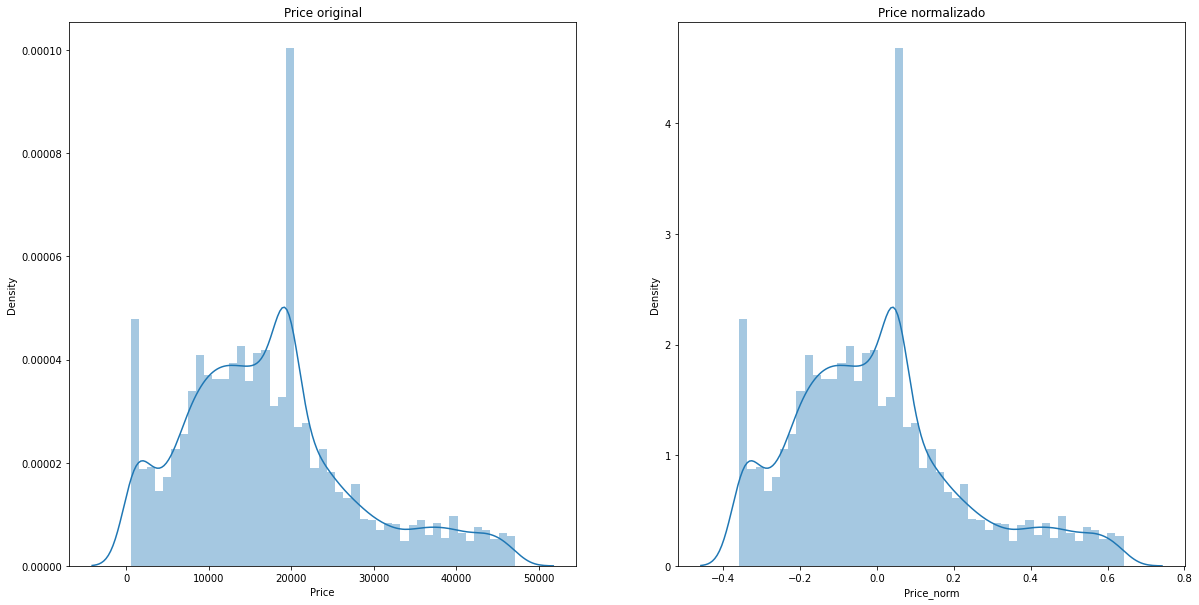

In [116]:
fig, axes = plt.subplots(1, 2)

axes[0].set_title('Price original')
axes[1].set_title('Price normalizado')

sns.distplot(df['Price'] ,ax = axes[0])
sns.distplot(df["Price_norm"], ax = axes[1]);

In [117]:
kstest(df['Price_norm'], 'norm')

KstestResult(statistic=0.3604372214918073, pvalue=0.0)

P-value < 0.05. Rechazamos nuestra H0

### <font color=violet> Logarítmica

In [118]:
df["Price_log"] = df["Price"].apply(lambda x: np.log(x) if x > 0 else 0)

In [119]:
df.head(2)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_norm,Price_log
0,13328.0,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Silver,12,-0.082907,9.497622
1,16621.0,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04,Black,8,-0.012253,9.718422


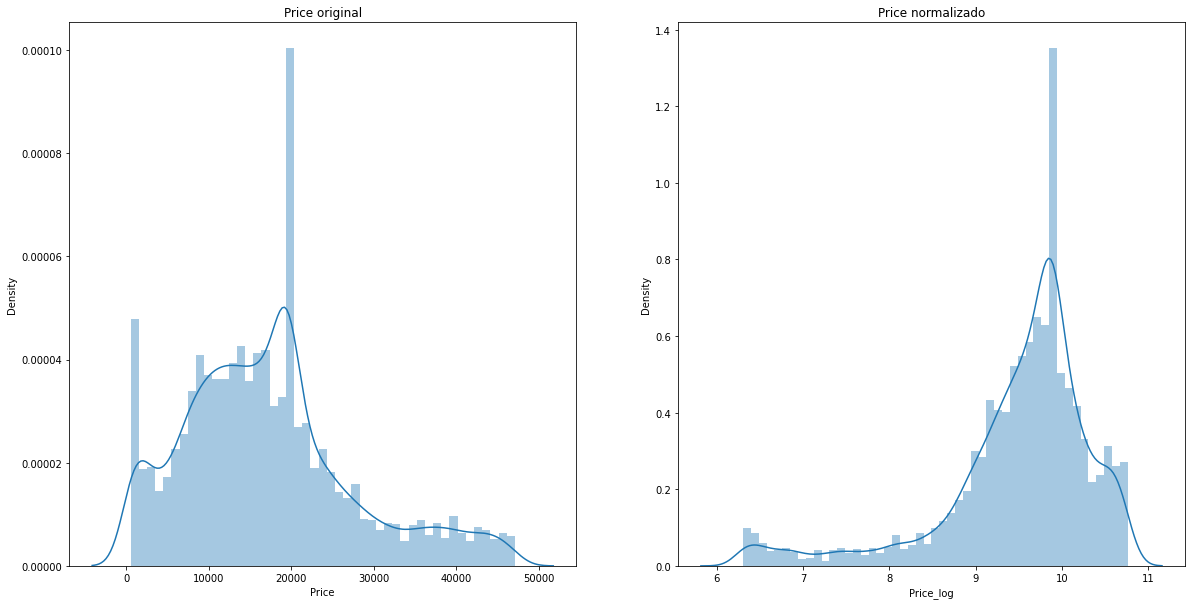

In [120]:
fig, axes = plt.subplots(1, 2)

axes[0].set_title('Price original')
axes[1].set_title('Price normalizado')

sns.distplot(df['Price'] ,ax = axes[0])
sns.distplot(df["Price_log"], ax = axes[1]);

In [121]:
kstest(df['Price_log'], 'norm')

KstestResult(statistic=0.9999999997427355, pvalue=0.0)

P-value < 0.05. Rechazamos nuestra H0

### <font color=violet> Raíz cuadrada

In [122]:
df["Price_raiz"] = df["Price"].apply(lambda x: math.sqrt(x))

In [123]:
df.head(2)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_norm,Price_log,Price_raiz
0,13328.0,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Silver,12,-0.082907,9.497622,115.446958
1,16621.0,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04,Black,8,-0.012253,9.718422,128.922457


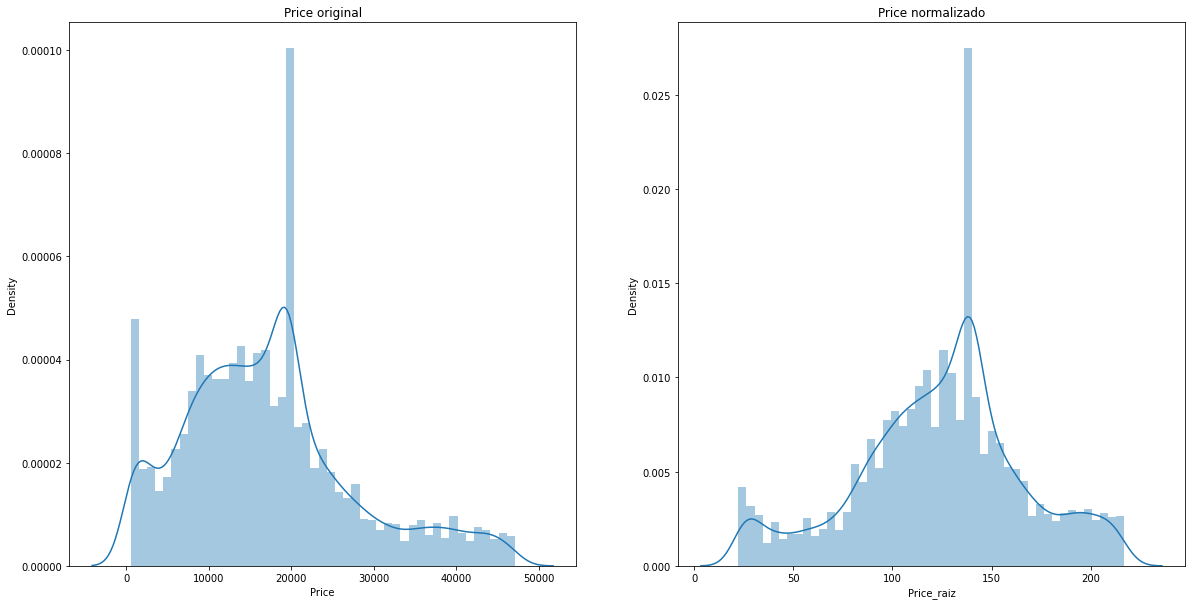

In [124]:
fig, axes = plt.subplots(1, 2)

axes[0].set_title('Price original')
axes[1].set_title('Price normalizado')

sns.distplot(df['Price'] ,ax = axes[0])
sns.distplot(df["Price_raiz"], ax = axes[1]);

In [125]:
kstest(df['Price_raiz'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

P-value < 0.05. Rechazamos nuestra H0

### <font color=violet> Stats.boxcox()

In [126]:
df['Price_box'], lambda_ajustada = stats.boxcox(df['Price'])

In [127]:
df.head(2)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_norm,Price_log,Price_raiz,Price_box
0,13328.0,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Silver,12,-0.082907,9.497622,115.446958,403.661414
1,16621.0,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04,Black,8,-0.012253,9.718422,128.922457,458.415409


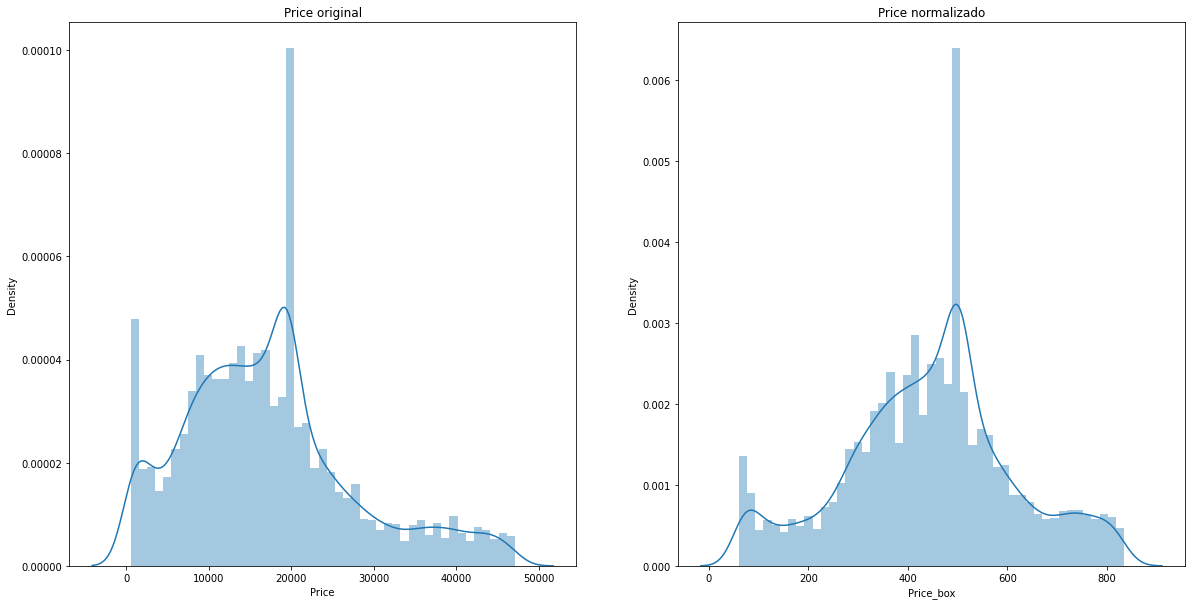

In [128]:
fig, axes = plt.subplots(1, 2)

axes[0].set_title('Price original')
axes[1].set_title('Price normalizado')

sns.distplot(df['Price'] ,ax = axes[0])
sns.distplot(df["Price_box"], ax = axes[1]);

In [129]:
kstest(df['Price_box'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

P-value < 0.05. Rechazamos nuestra H0

### <font color=violet> Sklearn MinMaxScaller

In [130]:
numericas = df.select_dtypes(include = np.number)

In [131]:
numericas

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Price_norm,Price_log,Price_raiz,Price_box
0,13328.0,1399.0,2010,186005.0,6.0,12,-0.082907,9.497622,115.446958,403.661414
1,16621.0,1018.0,2011,192000.0,6.0,8,-0.012253,9.718422,128.922457,458.415409
2,8467.0,0.0,2006,200000.0,4.0,2,-0.187205,9.043932,92.016303,310.748237
3,3607.0,862.0,2011,168966.0,4.0,0,-0.291481,8.190632,60.058305,189.776374
4,11726.0,446.0,2014,91901.0,4.0,4,-0.117280,9.369564,108.286657,374.942474
...,...,...,...,...,...,...,...,...,...,...
19224,19130.0,0.0,2014,35800.0,4.0,12,0.041580,9.859013,138.311243,497.072306
19225,8781.0,1107.0,2007,236000.0,4.0,4,-0.180468,9.080346,93.706990,317.345748
19226,7840.0,0.0,2003,220000.0,6.0,0,-0.200658,8.966994,88.543774,297.253832
19233,15681.0,831.0,2011,161600.0,4.0,8,-0.032421,9.660205,125.223800,443.298811


In [132]:
minmax = MinMaxScaler()

In [133]:
minmax.fit(df[['Price']])

MinMaxScaler()

In [134]:
X_normalizadas = minmax.transform(df[["Price"]])

In [135]:
X_normalizadas.min(axis=0)

array([0.])

In [136]:
X_normalizadas.max(axis=0)

array([1.])

In [137]:
numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["Price_Sklearn"])
numericas_minmax

,Price_Sklearn
0,0.275238
1,0.345892
2,0.170940
3,0.066664
4,0.240865
...,...
13579,0.399725
13580,0.177677
13581,0.157487
13582,0.325724


In [138]:
df["Price_Sklearn"] = numericas_minmax
df.head(2)

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_norm,Price_log,Price_raiz,Price_box,Price_Sklearn
0,13328.0,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Silver,12,-0.082907,9.497622,115.446958,403.661414,0.275238
1,16621.0,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04,Black,8,-0.012253,9.718422,128.922457,458.415409,0.345892


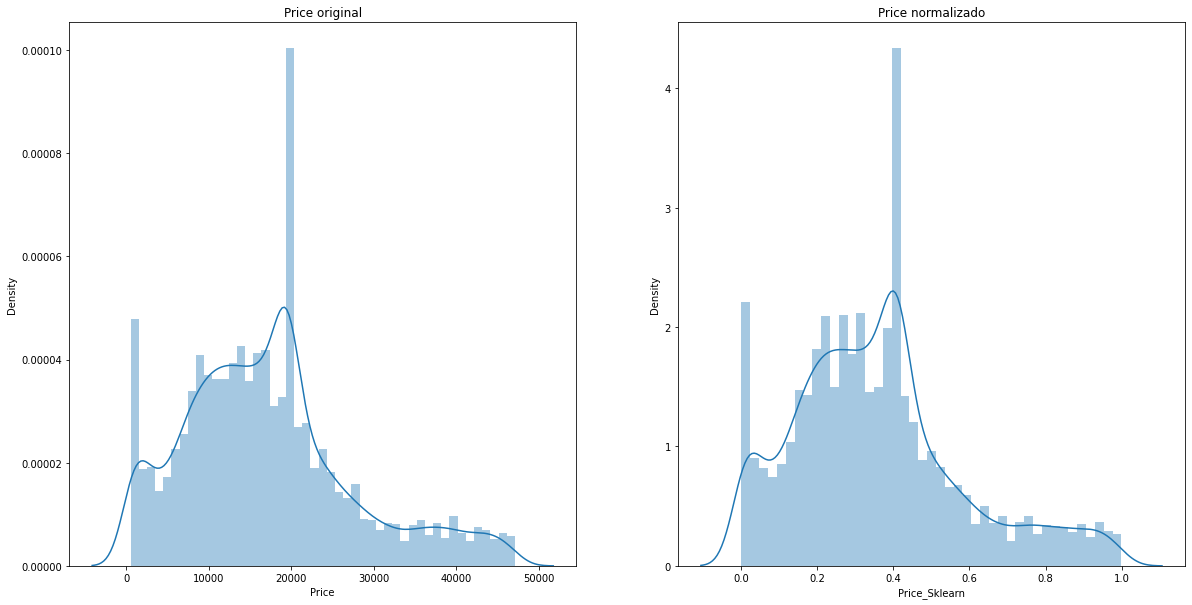

In [139]:
fig, axes = plt.subplots(1, 2)

axes[0].set_title('Price original')
axes[1].set_title('Price normalizado')

sns.distplot(df['Price'], ax = axes[0])
sns.distplot(df['Price_Sklearn'], ax = axes[1]);

In [140]:
kstest(df['Price_Sklearn'], 'norm') 

KstestResult(statistic=nan, pvalue=nan)

Luego de aplicar los métodos de Normalización hemos visto que en ninguna de las transformaciones hemos cumplido nuestro objetivo de que nuestros datos sean normales. Esto es algo normal, escogeremos la transformación que más se ha ajustado a la campana de Gauss visualmente. En nuestro caso, ha sido la transformación Raiz cuadrada. 


Dropeamos las columnas de precios normalizados que no vamos a usar.

In [141]:
df.drop(['Price_norm', 'Price_Sklearn', 'Price_box', 'Price_log' ], axis = 1, inplace = True)

In [142]:
df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Price_raiz
0,13328.0,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04,Silver,12,115.446958
1,16621.0,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04,Black,8,128.922457
2,8467.0,0.0,HONDA,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04,Black,2,92.016303
3,3607.0,862.0,FORD,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04,White,0,60.058305
4,11726.0,446.0,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04,Silver,4,108.286657


In [143]:
df.describe()

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Price_raiz
count,13584.000000,13584.000000,13584.000000,1.358400e+04,13584.000000,13584.000000,13584.000000
mean,17192.065182,581.027664,2011.728578,1.468467e+05,4.460247,6.733657,124.086680
std,10407.806933,462.942608,4.203401,1.651380e+05,1.119606,3.961573,42.363819
min,500.000000,0.000000,2001.000000,0.000000e+00,1.000000,0.000000,22.360680
25%,9885.750000,0.000000,2010.000000,6.800000e+04,4.000000,4.000000,99.427107
50%,16308.000000,640.000000,2012.000000,1.193865e+05,4.000000,6.000000,127.702780
75%,21950.000000,880.000000,2015.000000,1.731012e+05,4.000000,12.000000,148.155324
max,47107.000000,2151.000000,2020.000000,1.019978e+06,16.000000,16.000000,217.041471


##### <font color=green> Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [144]:
df.to_pickle('datos/cars_price3.pkl')

In [145]:
df.to_csv('datos/cars_price3.csv')